In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [2]:
%run _libraries.ipynb

In [211]:
%run _functions.ipynb

In [4]:
current_dir = '04-arima-week'

In [5]:
load_files_dir = '02-feature-engineering'

In [6]:
save_files = 'files/' + current_dir + '/'

In [7]:
load_files = 'files/' + load_files_dir + '/'

In [8]:
save_img = 'docs/img/' + current_dir + '/'

In [9]:
session_name = current_dir

# Section III. ARIMA

## Load Saved Section if exists

## Load Data

In [10]:
train = datasets_dict = loadit(
    'train', dir=load_files)

In [11]:
valid = datasets_dict = loadit(
    'valid', dir=load_files)

In [12]:
test = datasets_dict = loadit(
    'test', dir=load_files)

## Model 2: Weekly model

### ARIMA without exogs variables

In [25]:
len(train.loc['2017-05-22':]['week'].unique())

11

In [26]:
cv1_indexes_train, cv1_indexes_test = cv_split_indexes(
    data=train['target1'], start='2017-05-22', train_size=2, test_size=1, size_unit='weeks', n_splits=10, freq='10min')

In [29]:
cv1_indexes_train[0]

DatetimeIndex(['2017-05-08 00:00:00', '2017-05-08 00:10:00',
               '2017-05-08 00:20:00', '2017-05-08 00:30:00',
               '2017-05-08 00:40:00', '2017-05-08 00:50:00',
               '2017-05-08 01:00:00', '2017-05-08 01:10:00',
               '2017-05-08 01:20:00', '2017-05-08 01:30:00',
               ...
               '2017-05-21 22:20:00', '2017-05-21 22:30:00',
               '2017-05-21 22:40:00', '2017-05-21 22:50:00',
               '2017-05-21 23:00:00', '2017-05-21 23:10:00',
               '2017-05-21 23:20:00', '2017-05-21 23:30:00',
               '2017-05-21 23:40:00', '2017-05-21 23:50:00'],
              dtype='datetime64[ns]', length=2016, freq='10min')

In [30]:
cv1_indexes_test[0]

DatetimeIndex(['2017-05-22 00:00:00', '2017-05-22 00:10:00',
               '2017-05-22 00:20:00', '2017-05-22 00:30:00',
               '2017-05-22 00:40:00', '2017-05-22 00:50:00',
               '2017-05-22 01:00:00', '2017-05-22 01:10:00',
               '2017-05-22 01:20:00', '2017-05-22 01:30:00',
               ...
               '2017-05-28 22:20:00', '2017-05-28 22:30:00',
               '2017-05-28 22:40:00', '2017-05-28 22:50:00',
               '2017-05-28 23:00:00', '2017-05-28 23:10:00',
               '2017-05-28 23:20:00', '2017-05-28 23:30:00',
               '2017-05-28 23:40:00', '2017-05-28 23:50:00'],
              dtype='datetime64[ns]', length=1008, freq='10min')

In [31]:
cv1_indexes_train[-1]

DatetimeIndex(['2017-07-10 00:00:00', '2017-07-10 00:10:00',
               '2017-07-10 00:20:00', '2017-07-10 00:30:00',
               '2017-07-10 00:40:00', '2017-07-10 00:50:00',
               '2017-07-10 01:00:00', '2017-07-10 01:10:00',
               '2017-07-10 01:20:00', '2017-07-10 01:30:00',
               ...
               '2017-07-23 22:20:00', '2017-07-23 22:30:00',
               '2017-07-23 22:40:00', '2017-07-23 22:50:00',
               '2017-07-23 23:00:00', '2017-07-23 23:10:00',
               '2017-07-23 23:20:00', '2017-07-23 23:30:00',
               '2017-07-23 23:40:00', '2017-07-23 23:50:00'],
              dtype='datetime64[ns]', length=2016, freq='10min')

In [32]:
cv1_indexes_test[-1]

DatetimeIndex(['2017-07-24 00:00:00', '2017-07-24 00:10:00',
               '2017-07-24 00:20:00', '2017-07-24 00:30:00',
               '2017-07-24 00:40:00', '2017-07-24 00:50:00',
               '2017-07-24 01:00:00', '2017-07-24 01:10:00',
               '2017-07-24 01:20:00', '2017-07-24 01:30:00',
               ...
               '2017-07-30 22:20:00', '2017-07-30 22:30:00',
               '2017-07-30 22:40:00', '2017-07-30 22:50:00',
               '2017-07-30 23:00:00', '2017-07-30 23:10:00',
               '2017-07-30 23:20:00', '2017-07-30 23:30:00',
               '2017-07-30 23:40:00', '2017-07-30 23:50:00'],
              dtype='datetime64[ns]', length=1008, freq='10min')

In [34]:
cv1_results_week_model = cv_model_evaluation(
    data=train['target1'], start='2017-05-22', train_size=2, test_size=1, size_unit='weeks', n_splits=10, freq='10min',
    orders=[(1,1,2), (3,1,1)], fourier_periods=[[144], [144, 72]], fourier_orders=arange(1, 6, True))

Execution time: 0:53:01


In [97]:
cv1_week_models = cv1_results_week_model['models'].copy()

In [98]:
cv1_week_splits = pd.DataFrame(cv1_results_week_model['splits'])

In [99]:
cv1_week_splits

,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9,...,model74,model75,model76,model77,model78,model79,model80,model81,model82,model83
0,0.146836,0.170845,0.110812,0.095812,0.097985,0.103619,0.170845,0.119474,0.131224,0.124150,...,0.094090,0.093841,0.093877,0.094151,0.094090,0.094090,0.094090,0.093841,0.093877,0.094151
1,0.147520,0.138376,0.141517,0.157638,0.163665,0.153576,0.138376,0.137659,0.134051,0.135476,...,0.153345,0.156301,0.157578,0.154574,0.153345,0.153345,0.153345,0.156301,0.157578,0.154574
2,0.119014,0.095487,0.081481,0.095207,0.101589,0.093943,0.095487,0.081231,0.079736,0.079649,...,0.093308,0.094505,0.092977,0.093876,0.093308,0.093308,0.093308,0.094505,0.092977,0.093876
3,0.102957,0.120887,0.072598,0.044606,0.043625,0.053574,0.120887,0.080563,0.084116,0.085030,...,0.048699,0.048808,0.049485,0.048686,0.048699,0.048699,0.048699,0.048808,0.049485,0.048686
4,0.108758,0.123939,0.082222,0.049116,0.077922,0.073566,0.123939,0.084252,0.088505,0.089303,...,0.065906,0.065404,0.066638,0.066365,0.065906,0.065906,0.065906,0.065404,0.066638,0.066365
5,0.260960,0.150429,0.182743,0.212203,0.222378,0.193224,0.150429,0.178954,0.175628,0.175159,...,0.205296,0.206134,0.205009,0.205009,0.205295,0.205296,0.205296,0.206135,0.205013,0.205009
6,0.186066,0.273986,0.231958,0.183380,0.170493,0.179758,0.273986,0.220321,0.230890,0.230729,...,0.179819,0.180293,0.179538,0.182876,0.179819,0.179819,0.179819,0.180293,0.179538,0.182876
7,0.165648,0.252116,0.205345,0.154250,0.143204,0.156920,0.252116,0.194763,0.210945,0.208983,...,0.156504,0.155194,0.147600,0.151605,0.156502,0.156503,0.156501,0.155193,0.147601,0.151606
8,0.117039,0.123558,0.080882,0.052375,0.053841,0.057550,0.123558,0.075910,0.085753,0.083864,...,0.052043,0.051840,0.051640,0.053587,0.052043,0.052043,0.052043,0.051839,0.051639,0.053601
9,0.115853,0.147388,0.090255,0.046321,0.042499,0.050033,0.147388,0.090033,0.106789,0.103776,...,0.056095,0.055748,0.054037,0.055650,0.056095,0.056095,0.056104,0.055749,0.054037,0.055651


In [100]:
cv1_week_splits_desriptive = pd.DataFrame(index=cv1_week_splits.columns)

In [101]:
cv1_week_splits_desriptive['mean'] = cv1_week_splits.mean()
cv1_week_splits_desriptive['std'] = cv1_week_splits.std()
# cv1_week_splits_desriptive['margin_up'] = \
#     cv1_week_splits_desriptive['mean'] + 1.96*cv1_week_splits_desriptive['std']/np.sqrt(5)
# cv1_week_splits_desriptive['margin_low'] = \
#     cv1_week_splits_desriptive['mean'] - 1.96*cv1_week_splits_desriptive['std']/np.sqrt(5)

In [102]:
cv1_week_splits_top_models = cv1_week_splits_desriptive.sort_values('mean')[:10].index

In [103]:
cv1_week_splits_top_models

Index(['model25', 'model19', 'model24', 'model3', 'model76', 'model82',
       'model46', 'model73', 'model72', 'model47'],
      dtype='object')

In [104]:
# top df without sort
cv1_week_splits_top = \
    cv1_week_splits.loc[:, cv1_week_splits.columns.isin(cv1_week_splits_top_models)].copy()

In [105]:
cv1_week_splits_desriptive_top = \
    cv1_week_splits_desriptive.loc[cv1_week_splits_desriptive.index.isin(cv1_week_splits_top_models)].copy()

In [106]:
cv1_week_splits_desriptive_top

,mean,std
model3,0.109091,0.063095
model19,0.109091,0.063094
model24,0.109091,0.063094
model25,0.109091,0.063094
model46,0.109897,0.055427
model47,0.110510,0.058207
model72,0.109899,0.055430
model73,0.109899,0.055428
model76,0.109838,0.057898
model82,0.109838,0.057899


In [107]:
cv1_week_splits_best_model = cv1_week_splits_desriptive_top.sort_values('mean').index[0]

In [108]:
cv1_week_splits_best_model

'model25'

In [109]:
for model in cv1_week_splits_desriptive_top.index:
    cv1_week_splits_desriptive_top.loc[model, 'lower'] = \
        ci_bootstrap(cv1_week_splits[model])['ci_min']
    cv1_week_splits_desriptive_top.loc[model, 'upper'] = \
        ci_bootstrap(cv1_week_splits[model])['ci_max']

In [110]:
cv1_week_splits_desriptive_top

,mean,std,lower,upper
model3,0.109091,0.063095,0.077107,0.152340
model19,0.109091,0.063094,0.077107,0.152340
model24,0.109091,0.063094,0.077107,0.152340
model25,0.109091,0.063094,0.077107,0.152339
model46,0.109897,0.055427,0.081333,0.147108
model47,0.110510,0.058207,0.080148,0.150232
model72,0.109899,0.055430,0.081333,0.147113
model73,0.109899,0.055428,0.081333,0.147111
model76,0.109838,0.057898,0.080005,0.148502
model82,0.109838,0.057899,0.080005,0.148504


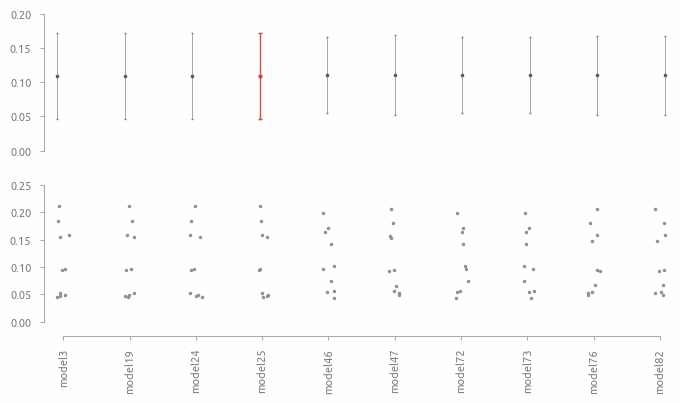

In [111]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))

ax[0].scatter(
    x = cv1_week_splits_desriptive_top.index,
    y = cv1_week_splits_desriptive_top['mean'],
    s=10)

ax[0].errorbar(
    x = cv1_week_splits_desriptive_top.index,
    y = cv1_week_splits_desriptive_top['mean'],
    yerr = cv1_week_splits_desriptive_top['std'],
    ls='none',
    lw=0.5,
    capsize=1,
    alpha=0.75)

# best model
ax[0].errorbar(
    x = cv1_week_splits_desriptive_top.loc[cv1_week_splits_best_model].name,
    y = cv1_week_splits_desriptive_top.loc[cv1_week_splits_best_model]['mean'],
    yerr = cv1_week_splits_desriptive_top.loc[cv1_week_splits_best_model]['std'],
    ls='none',
    lw=1,
    marker='.',
    markersize=4,
    capsize=1.5,
    color=saturate_color(palette[1], 1.5))

axis_rstyle(ax=ax[0], yticks=[0, 0.20, 0.05], ylim=[0, 0.20])
ax[0].spines['bottom'].set_visible(False)
ax[0].tick_params(bottom=False, labelbottom=False)

sns.stripplot(
    cv1_week_splits_top,
    s=5,
    color=palette[-2],
    ax=ax[1])

axis_rstyle(ax=ax[1])

plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.25)

In [112]:
# top 5 model smoothed data
cv1_week_splits_top_smoothed = smoothed(cv1_week_splits_top[cv1_week_splits_top_models], n=200)

In [113]:
cv1_week_splits_top_smoothed

,model25,model19,model24,model3,model76,model82,model46,model73,model72,model47
0.000000,0.095812,0.095812,0.095812,0.095812,0.093877,0.093877,0.097005,0.097009,0.097006,0.094090
0.045226,0.103785,0.103785,0.103785,0.103785,0.102197,0.102196,0.105310,0.105314,0.105311,0.101721
0.090452,0.111157,0.111157,0.111157,0.111157,0.109883,0.109883,0.113002,0.113006,0.113003,0.108778
0.135678,0.117945,0.117945,0.117945,0.117945,0.116954,0.116954,0.120097,0.120101,0.120098,0.115277
0.180905,0.124166,0.124166,0.124166,0.124166,0.123428,0.123428,0.126612,0.126616,0.126613,0.121233
...,...,...,...,...,...,...,...,...,...,...
8.819095,0.028413,0.028412,0.028412,0.028412,0.035215,0.035214,0.029050,0.029050,0.029050,0.034235
8.864322,0.031869,0.031868,0.031868,0.031868,0.038941,0.038940,0.031585,0.031585,0.031585,0.038568
8.909548,0.035989,0.035989,0.035989,0.035988,0.043304,0.043303,0.034663,0.034663,0.034663,0.043637
8.954774,0.040799,0.040798,0.040798,0.040798,0.048329,0.048328,0.038304,0.038304,0.038304,0.049471


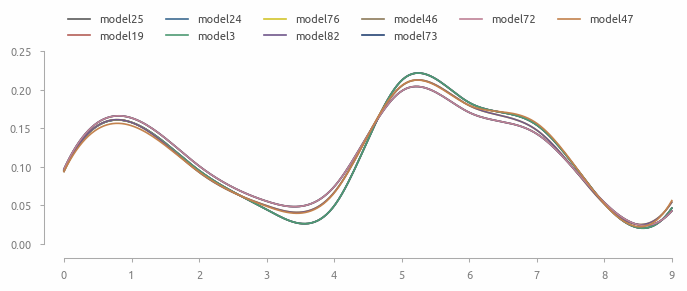

In [114]:
plt.plot(
    cv1_week_splits_top_smoothed
)
plt.legend(**legend_inline(), labels=cv1_week_splits_top_smoothed.columns);
ax_current().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
axis_rstyle(xticks=[0, 9, 1], offset_left=10)

In [115]:
cv1_week_period = train.loc['2017-05-22':'2017-07-30'].groupby('week').mean().copy()

In [116]:
cv1_week_period = train.loc['2017-05-22':'2017-07-30'].groupby('week').agg({'target1': ['mean', 'std']})

In [117]:
cv1_week_period

target1             
              mean          std
week                           
21    33421.514442  7224.772556
22    34221.089650  7133.985678
23    34499.918007  7145.742065
24    35152.570167  7199.793188
25    36620.107222  7489.886715
26    31517.131081  6324.227582
27    34202.385698  6739.189730
28    35866.413542  6585.599871
29    36166.998893  6954.952223
30    37816.149344  6916.816790

In [120]:
cv1_week_period_best_model = cv1_week_splits_top[cv1_week_splits_best_model].copy()

In [121]:
cv1_week_period_best_model.index = cv1_week_period_best_model.index + 21

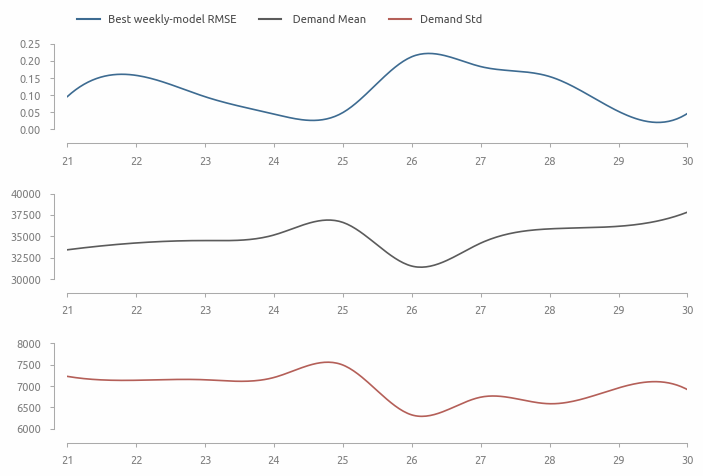

In [128]:
# top model

plt.figure(figsize=(8, 5))

plt.subplot(3, 1, 1)
plt.plot(
    smoothed(cv1_week_period_best_model),
    color=palette[2],
    label=cv1_week_splits_best_model
)
# ax_current().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
axis_rstyle(xlim=[21, 30], xticks=[21, 30, 1], offset_left=10)
# plt.xticks(arange(10))
# axis_remove_xaxis()
plt.legend(
    **legend_inline(3, bbox_to_anchor=(0, 1.1)),
    **legend_create_handles(
        3,
        labels=['Best weekly-model RMSE', ' Demand Mean', 'Demand Std'],
        colors=[palette[2], palette[0], palette[1]]
    ));
# axis_remove_xaxis()

plt.subplot(3, 1, 2)
plt.plot(
    smoothed(cv1_week_period['target1']['mean']),
)
axis_rstyle(xlim=[21, 30], xticks=[21, 30, 1], yticks=[30000, 40000, 2500], offset_left=10)
# plt.xticks(arange(10))
# axis_remove_xaxis()

plt.subplot(3, 1, 3)
plt.plot(
    smoothed(cv1_week_period['target1']['std']),
    color=palette[1],
)
# ax_current().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
axis_rstyle(xlim=[21, 30], xticks=[21, 30, 1], yticks=[6000, 8000, 500], offset_left=10)

# plt.xticks(arange(10))
plt.subplots_adjust(hspace=0.75)
plt.show()

In [168]:
arima1_week = cv1_week_models[cv1_week_splits_best_model]

In [169]:
arima1_week

((1, 1, 2), [144, 72], [4, 2])

In [170]:
cv1_week_splits_desriptive_top.loc[cv1_week_splits_best_model]

mean     0.109091
std      0.063094
lower    0.077107
upper    0.152339
Name: model25, dtype: float64

In [171]:
cv1_week_splits[cv1_week_splits_best_model]

0    0.095812
1    0.157638
2    0.095207
3    0.044606
4    0.049116
5    0.212201
6    0.183380
7    0.154250
8    0.052375
9    0.046322
Name: model25, dtype: float64

### ARIMA with exogs variables

In [133]:
exog_vars = ['temperature', 'target1_by_minutes', 'is_Friday', 'is_Sunday', 'is_31']

In [137]:
exogs_df = train.loc['2017-05-08':, exog_vars].copy()

In [138]:
cv2_results_week_model = cv_model_evaluation(
    data=train['target1'], start='2017-05-22', train_size=2, test_size=1, size_unit='weeks', n_splits=10, freq='10min',
    orders=[(1,1,2), (3,1,1)], fourier_periods=[[144], [144, 72]], fourier_orders=arange(1, 6, True),
    exog_variables=exogs_df
)

Execution time: 1:17:18


In [139]:
cv2_week_models = cv2_results_week_model['models'].copy()

In [140]:
cv2_week_splits = pd.DataFrame(cv2_results_week_model['splits'])

In [141]:
cv2_week_splits

,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9,...,model74,model75,model76,model77,model78,model79,model80,model81,model82,model83
0,0.139721,0.142153,0.107023,0.097345,0.100543,0.101065,0.142153,0.109105,0.115594,0.112558,...,0.093831,0.093623,0.093754,0.093701,0.093831,0.093831,0.093830,0.093623,0.093755,0.093701
1,0.158451,0.131473,0.142550,0.160275,0.165895,0.155102,0.131473,0.138777,0.132855,0.134137,...,0.154942,0.157302,0.158616,0.155644,0.154942,0.154942,0.154941,0.157302,0.158616,0.155644
2,0.125281,0.079343,0.081834,0.097390,0.103663,0.097541,0.079343,0.082527,0.079115,0.078355,...,0.096901,0.096241,0.095298,0.096768,0.096901,0.096901,0.096901,0.096240,0.095298,0.096768
3,0.092734,0.080572,0.058372,0.043839,0.044729,0.050307,0.080572,0.060574,0.061186,0.063289,...,0.045510,0.045912,0.046388,0.045371,0.045507,0.045506,0.045509,0.045912,0.046388,0.045371
4,0.095504,0.096877,0.073646,0.050112,0.045565,0.078465,0.096877,0.074377,0.075853,0.078983,...,0.069233,0.069373,0.071233,0.070731,0.069234,0.069233,0.069234,0.069373,0.071236,0.070731
5,0.253117,0.170955,0.188492,0.207535,0.215756,0.193230,0.170955,0.185619,0.185944,0.183004,...,0.203798,0.203115,0.201526,0.201864,0.203796,0.203799,0.203798,0.203115,0.201526,0.201864
6,0.176822,0.261144,0.232946,0.185434,0.170591,0.178987,0.261144,0.222238,0.234129,0.235187,...,0.179051,0.178380,0.177537,0.179788,0.179051,0.179051,0.179051,0.178380,0.177537,0.179788
7,0.147760,0.243675,0.203029,0.157354,0.145147,0.157782,0.243675,0.199537,0.213320,0.212644,...,0.157834,0.157379,0.149200,0.151626,0.157857,0.157858,0.157856,0.157379,0.149200,0.151625
8,0.121550,0.118643,0.081072,0.051661,0.050923,0.061811,0.118643,0.080692,0.090714,0.089532,...,0.049517,0.049126,0.048650,0.048620,0.049517,0.049519,0.049517,0.049127,0.048650,0.048620
9,0.111024,0.133944,0.086520,0.049215,0.043803,0.049809,0.133944,0.094211,0.108696,0.107618,...,0.053891,0.053725,0.052418,0.053346,0.053887,0.053891,0.053888,0.053725,0.052417,0.053355


In [142]:
cv2_week_splits_desriptive = pd.DataFrame(index=cv2_week_splits.columns)

In [143]:
cv2_week_splits_desriptive['mean'] = cv2_week_splits.mean()
cv2_week_splits_desriptive['std'] = cv2_week_splits.std()
# cv2_week_splits_desriptive['margin_up'] = \
#     cv2_week_splits_desriptive['mean'] + 1.96*cv2_week_splits_desriptive['std']/np.sqrt(5)
# cv2_week_splits_desriptive['margin_low'] = \
#     cv2_week_splits_desriptive['mean'] - 1.96*cv2_week_splits_desriptive['std']/np.sqrt(5)

In [144]:
cv2_week_splits_top_models = cv2_week_splits_desriptive.sort_values('mean')[:10].index

In [145]:
cv2_week_splits_top_models

Index(['model31', 'model30', 'model4', 'model76', 'model82', 'model77',
       'model83', 'model25', 'model24', 'model19'],
      dtype='object')

In [146]:
# top df without sort
cv2_week_splits_top = \
    cv2_week_splits.loc[:, cv2_week_splits.columns.isin(cv2_week_splits_top_models)].copy()

In [147]:
cv2_week_splits_desriptive_top = \
    cv2_week_splits_desriptive.loc[cv2_week_splits_desriptive.index.isin(cv2_week_splits_top_models)].copy()

In [148]:
cv2_week_splits_desriptive_top

,mean,std
model4,0.108662,0.062903
model19,0.110016,0.062676
model24,0.110016,0.062676
model25,0.110016,0.062676
model30,0.108662,0.062903
model31,0.108662,0.062903
model76,0.109462,0.057682
model77,0.109746,0.057986
model82,0.109462,0.057682
model83,0.109747,0.057985


In [149]:
cv2_week_splits_best_model = cv2_week_splits_desriptive_top.sort_values('mean').index[0]

In [150]:
cv2_week_splits_best_model

'model31'

In [151]:
for model in cv2_week_splits_desriptive_top.index:
    cv2_week_splits_desriptive_top.loc[model, 'lower'] = \
        ci_bootstrap(cv2_week_splits[model])['ci_min']
    cv2_week_splits_desriptive_top.loc[model, 'upper'] = \
        ci_bootstrap(cv2_week_splits[model])['ci_max']

In [152]:
cv2_week_splits_desriptive_top

,mean,std,lower,upper
model4,0.108662,0.062903,0.075686,0.150790
model19,0.110016,0.062676,0.077244,0.151952
model24,0.110016,0.062676,0.077244,0.151952
model25,0.110016,0.062676,0.077244,0.151952
model30,0.108662,0.062903,0.075686,0.150790
model31,0.108662,0.062903,0.075686,0.150790
model76,0.109462,0.057682,0.080008,0.148371
model77,0.109746,0.057986,0.079819,0.148327
model82,0.109462,0.057682,0.080009,0.148371
model83,0.109747,0.057985,0.079822,0.148327


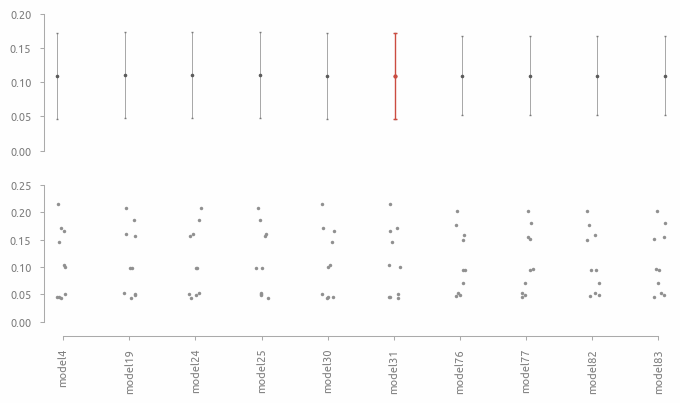

In [153]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))

ax[0].scatter(
    x = cv2_week_splits_desriptive_top.index,
    y = cv2_week_splits_desriptive_top['mean'],
    s=10)

ax[0].errorbar(
    x = cv2_week_splits_desriptive_top.index,
    y = cv2_week_splits_desriptive_top['mean'],
    yerr = cv2_week_splits_desriptive_top['std'],
    ls='none',
    lw=0.5,
    capsize=1,
    alpha=0.75)

# best model
ax[0].errorbar(
    x = cv2_week_splits_desriptive_top.loc[cv2_week_splits_best_model].name,
    y = cv2_week_splits_desriptive_top.loc[cv2_week_splits_best_model]['mean'],
    yerr = cv2_week_splits_desriptive_top.loc[cv2_week_splits_best_model]['std'],
    ls='none',
    lw=1,
    marker='.',
    markersize=4,
    capsize=1.5,
    color=saturate_color(palette[1], 1.5))

axis_rstyle(ax=ax[0], yticks=[0, 0.20, 0.05], ylim=[0, 0.20])
ax[0].spines['bottom'].set_visible(False)
ax[0].tick_params(bottom=False, labelbottom=False)

sns.stripplot(
    cv2_week_splits_top,
    s=5,
    color=palette[-2],
    ax=ax[1])

axis_rstyle(ax=ax[1])

plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.25)

In [154]:
# top 5 model smoothed data
cv2_week_splits_top_smoothed = smoothed(cv2_week_splits_top[cv2_week_splits_top_models], n=200)

In [155]:
cv2_week_splits_top_smoothed

,model31,model30,model4,model76,model82,model77,model83,model25,model24,model19
0.000000,0.100543,0.100543,0.100543,0.093754,0.093755,0.093701,0.093701,0.097345,0.097345,0.097345
0.045226,0.108615,0.108615,0.108615,0.101860,0.101861,0.101211,0.101210,0.105326,0.105326,0.105326
0.090452,0.116098,0.116098,0.116098,0.109371,0.109372,0.108181,0.108181,0.112714,0.112714,0.112714
0.135678,0.123008,0.123008,0.123008,0.116301,0.116302,0.114628,0.114627,0.119524,0.119524,0.119524
0.180905,0.129360,0.129360,0.129360,0.122667,0.122667,0.120563,0.120563,0.125774,0.125774,0.125774
...,...,...,...,...,...,...,...,...,...,...
8.819095,0.026995,0.026995,0.026995,0.032011,0.032011,0.032169,0.032176,0.029515,0.029515,0.029515
8.864322,0.030218,0.030218,0.030218,0.036060,0.036059,0.036379,0.036386,0.033360,0.033360,0.033360
8.909548,0.034078,0.034078,0.034078,0.040794,0.040794,0.041295,0.041302,0.037908,0.037908,0.037908
8.954774,0.038599,0.038599,0.038599,0.046239,0.046238,0.046942,0.046950,0.043184,0.043184,0.043184


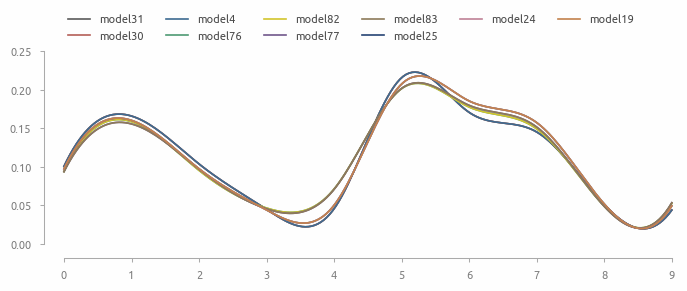

In [156]:
plt.plot(
    cv2_week_splits_top_smoothed
)
plt.legend(**legend_inline(), labels=cv2_week_splits_top_smoothed.columns);
ax_current().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
axis_rstyle(xticks=[0, 9, 1], offset_left=10)

In [157]:
cv2_week_period = train.loc['2017-05-22':'2017-07-30'].groupby('week').mean().copy()

In [158]:
cv2_week_period = train.loc['2017-05-22':'2017-07-30'].groupby('week').agg({'target1': ['mean', 'std']})

In [159]:
cv2_week_period

target1             
              mean          std
week                           
21    33421.514442  7224.772556
22    34221.089650  7133.985678
23    34499.918007  7145.742065
24    35152.570167  7199.793188
25    36620.107222  7489.886715
26    31517.131081  6324.227582
27    34202.385698  6739.189730
28    35866.413542  6585.599871
29    36166.998893  6954.952223
30    37816.149344  6916.816790

In [160]:
cv2_week_period_best_model = cv2_week_splits_top[cv2_week_splits_best_model].copy()

In [161]:
cv2_week_period_best_model.index = cv2_week_period_best_model.index + 21

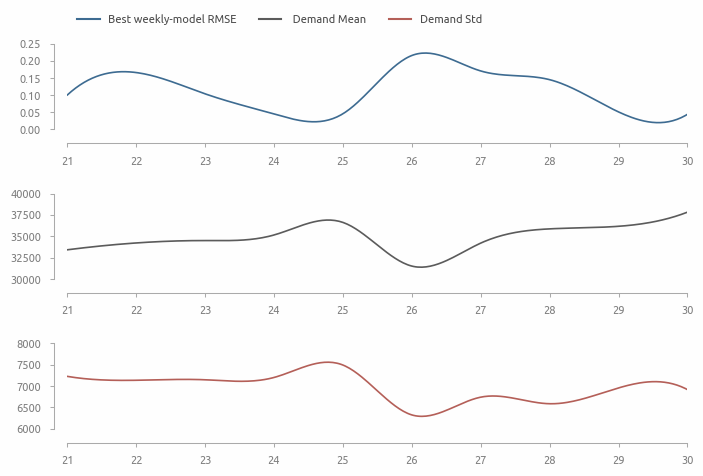

In [162]:
# top model

plt.figure(figsize=(8, 5))

plt.subplot(3, 1, 1)
plt.plot(
    smoothed(cv2_week_period_best_model),
    color=palette[2],
    label=cv2_week_splits_best_model
)
# ax_current().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
axis_rstyle(xlim=[21, 30], xticks=[21, 30, 1], offset_left=10)
# plt.xticks(arange(10))
# axis_remove_xaxis()
plt.legend(
    **legend_inline(3, bbox_to_anchor=(0, 1.1)),
    **legend_create_handles(
        3,
        labels=['Best weekly-model RMSE', ' Demand Mean', 'Demand Std'],
        colors=[palette[2], palette[0], palette[1]]
    ));
# axis_remove_xaxis()

plt.subplot(3, 1, 2)
plt.plot(
    smoothed(cv2_week_period['target1']['mean']),
)
axis_rstyle(xlim=[21, 30], xticks=[21, 30, 1], yticks=[30000, 40000, 2500], offset_left=10)
# plt.xticks(arange(10))
# axis_remove_xaxis()

plt.subplot(3, 1, 3)
plt.plot(
    smoothed(cv2_week_period['target1']['std']),
    color=palette[1],
)
# ax_current().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
axis_rstyle(xlim=[21, 30], xticks=[21, 30, 1], yticks=[6000, 8000, 500], offset_left=10)

# plt.xticks(arange(10))
plt.subplots_adjust(hspace=0.75)
plt.show()

In [172]:
arima2_week = cv2_week_models[cv2_week_splits_best_model]

In [173]:
arima2_week

((1, 1, 2), [144, 72], [5, 2])

In [174]:
cv2_week_splits_desriptive_top.loc[cv2_week_splits_best_model]

mean     0.108662
std      0.062903
lower    0.075686
upper    0.150790
Name: model31, dtype: float64

In [175]:
cv2_week_splits[cv2_week_splits_best_model]

0    0.100543
1    0.165895
2    0.103663
3    0.044729
4    0.045565
5    0.215756
6    0.170591
7    0.145147
8    0.050923
9    0.043803
Name: model31, dtype: float64

In [176]:
arima_week = arima2_week

### Forecasts

In [177]:
arima_week_order = arima_week[0]
arima_week_fourier_period = arima_week[1]
arima_week_fourier_order = arima_week[2]

In [178]:
arima_week_order, arima_week_fourier_period, arima_week_fourier_order

((1, 1, 2), [144, 72], [5, 2])

#### August forecast

In [205]:
data_august = pd.concat([train, valid], axis=0)

In [206]:
data_august = data_august[['target1', *exog_vars]].copy()

In [207]:
data_august = data_august['2017-02-01':].copy()

In [208]:
is_nan(data_august)

No NaN values in DataFrame


In [209]:
data_august

,target1,temperature,target1_by_minutes,is_Friday,is_Sunday,is_31
2017-02-01 00:00:00,29892.20339,11.57,34055.69620,0,0,0
2017-02-01 00:10:00,29086.77966,11.48,29814.68354,0,0,0
2017-02-01 00:20:00,28244.74576,11.43,29128.10127,0,0,0
2017-02-01 00:30:00,27793.22034,11.42,28228.86076,0,0,0
2017-02-01 00:40:00,27286.77966,11.30,27335.69620,0,0,0
...,...,...,...,...,...,...
2017-08-31 23:10:00,38619.48946,22.31,43407.30897,0,0,1
2017-08-31 23:20:00,38370.16648,22.36,42507.90698,0,0,1
2017-08-31 23:30:00,37724.48391,22.34,41659.53488,0,0,1
2017-08-31 23:40:00,36874.22863,22.26,40843.05648,0,0,1


In [220]:
august_week_forecasts = week_model_forecasts(
    arima_week_order, arima_week_fourier_period, arima_week_fourier_order,
    data=data_august['target1'], exog=data_august[exog_vars],
    start='2017-08-01', end='2017-08-31', periods=5)

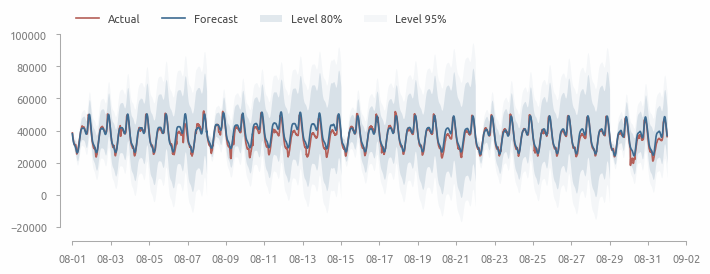

In [221]:
plt.plot(
    valid['target1'],
    label='Actual',
    color=palette[1]);
plt.plot(
    august_week_forecasts.index,
    august_week_forecasts['forecast'],
    label='Forecast',
    color=palette[2])
plt.fill_between(
    x=august_week_forecasts.index,
    y1=august_week_forecasts['lower80'],
    y2=august_week_forecasts['upper80'],
    label='Level 80%',
    color=palette[2],
    lw=0,
    alpha=0.15)
plt.fill_between(
    x=august_week_forecasts.index,
    y1=august_week_forecasts['lower95'],
    y2=august_week_forecasts['upper95'],
    label='Level 95%',
    color=palette[2],
    lw=0,
    alpha=0.05)

ax_current().set_xticks(ticks=pd.date_range(start='2017-08-01', end='2017-09-02', freq='2d'))
ax_current().xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%m-%d'))
axis_rstyle(ylim=[-20000, 100000])
plt.legend(**legend_inline())
plt.show()

In [222]:
root_mean_squared_log_error(august_week_forecasts['forecast'], valid['target1'])

0.07009593495091912

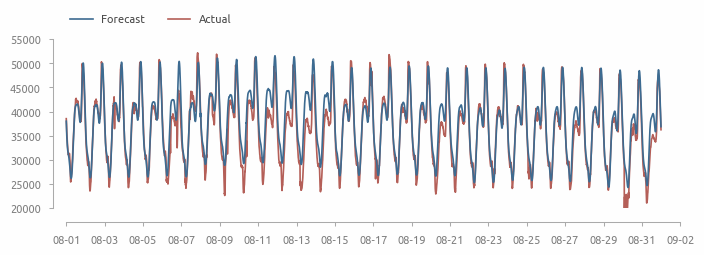

In [227]:
plt.plot(
    august_week_forecasts.index,
    august_week_forecasts['forecast'],
    label='Forecast',
    color=palette[2], zorder=100)
plt.plot(
    valid['target1'],
    label='Actual',
    color=palette[1]);

ax_current().set_xticks(ticks=pd.date_range(start='2017-08-01', end='2017-09-02', freq='2d'))
ax_current().xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%m-%d'))
axis_rstyle(ylim=[20000, 60000])
plt.legend(**legend_inline(bbox_to_anchor=(0, 0.9)))
plt.show()

## Save Data

In [ ]:
saveit(train, 'train', save_files)

In [ ]:
saveit(valid, 'valid', save_files)

In [ ]:
saveit(test, 'test', save_files)

### Save Session

In [ ]:
save_session(session_name)

### Execution time

In [ ]:
print(f'Execution time: {stopwatch.stop(start)}')